In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

data is missing in age, embarked and cabin columns

In [7]:
#filling the missing values in dataset

from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='most_frequent')
df['Cabin']=imp.fit_transform(df['Cabin'].values.reshape(-1,1))
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))

imp=SimpleImputer(strategy='mean')
df['Age']=imp.fit_transform(df['Age'].values.reshape(-1,1))

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Now there is no missing values in the dataset

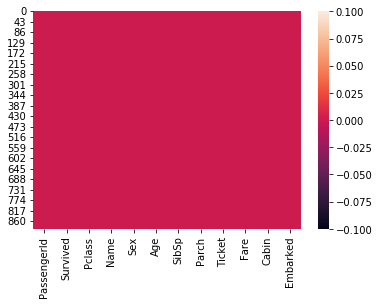

In [9]:
#Data visualization
#checking missing values
sns.heatmap(df.isnull())

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
#Statisticial Summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


key obseravtions:
1. the mean is more than median(50th percentile) in survived, sibsp and fare columns
2. there is large difference in 75% percentile and max in passengerid, age, sibsp, parch and fare columns

In [12]:
#Exploring data variable
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

there are 3 unique values in target variable

In [13]:
#coverting string data into integer data
import sklearn
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

list1=['Name','Sex','Ticket','Cabin','Embarked']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
    
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,523,7.2500,47,2
1,2,1,1,190,0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.000000,0,0,669,7.9250,47,2
3,4,1,1,272,0,35.000000,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.000000,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.000000,0,0,101,13.0000,47,2
887,888,1,1,303,0,19.000000,0,0,14,30.0000,30,2
888,889,0,3,413,0,29.699118,1,2,675,23.4500,47,2
889,890,1,1,81,1,26.000000,0,0,8,30.0000,60,0


2    646
0    168
1     77
Name: Embarked, dtype: int64


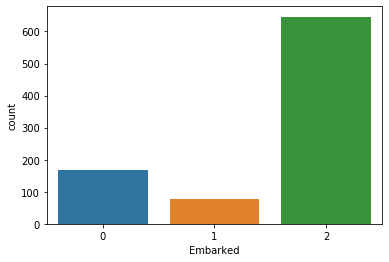

In [14]:
a=sns.countplot(x='Embarked',data=df)
print(df['Embarked'].value_counts())

dataset is imbalanced

In [15]:
#checking correlation
dfcor=df.corr()
dfcor

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.033207,-0.057527,-0.001652,-0.056554,0.012658,-0.018086,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,0.175690,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,-0.248495,0.162098
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.017230,-0.049105,0.047348,-0.049173,0.034129,-0.006117
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,-0.102643,0.108262
Age,0.033207,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,0.056011,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,-0.005539,0.068230
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.022682,0.039798
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.072200,-0.001729
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,0.090516,-0.224719


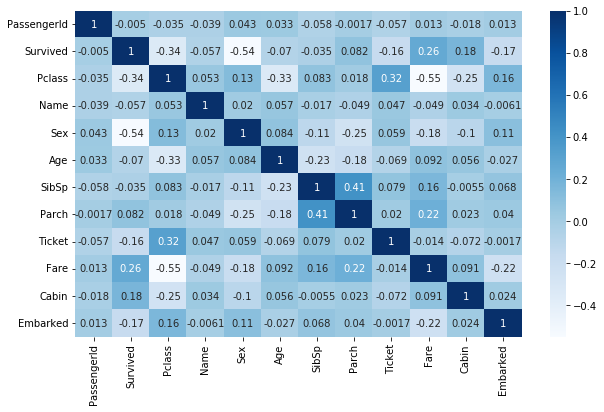

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap="Blues",annot=True)

observations:
    
1. survived and pclass is negatively correlated with each other
2. embarked is highly correlated with pclass


PassengerId       AxesSubplot(0.125,0.536818;0.110714x0.343182)
Survived       AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Pclass         AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Name           AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Sex            AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Age            AxesSubplot(0.789286,0.536818;0.110714x0.343182)
SibSp                AxesSubplot(0.125,0.125;0.110714x0.343182)
Parch             AxesSubplot(0.257857,0.125;0.110714x0.343182)
Ticket            AxesSubplot(0.390714,0.125;0.110714x0.343182)
Fare              AxesSubplot(0.523571,0.125;0.110714x0.343182)
Cabin             AxesSubplot(0.656429,0.125;0.110714x0.343182)
Embarked          AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

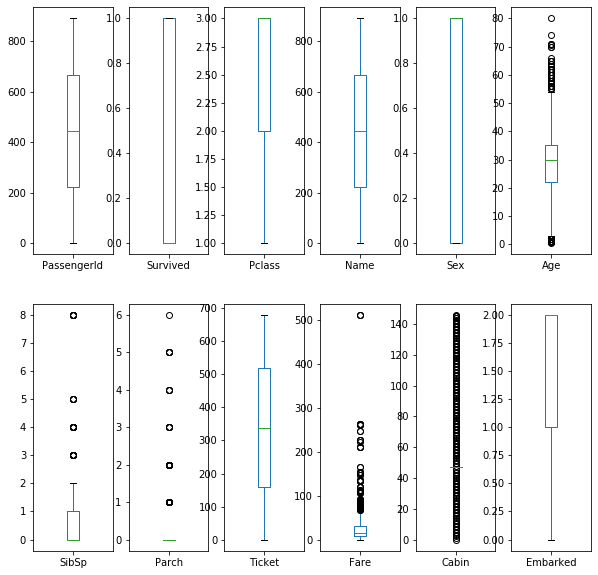

In [17]:
#finding outliers
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

outliers are present in age, sibsp,parch,fare and cabin columns

In [18]:
#checking skewness
df.skew().sort_values()

Embarked      -1.264823
Pclass        -0.630548
Sex           -0.618921
PassengerId    0.000000
Name           0.000000
Ticket         0.000246
Age            0.434488
Survived       0.478523
Cabin          2.268926
Parch          2.749117
SibSp          3.695352
Fare           4.787317
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015982708>,
      dtype=object)

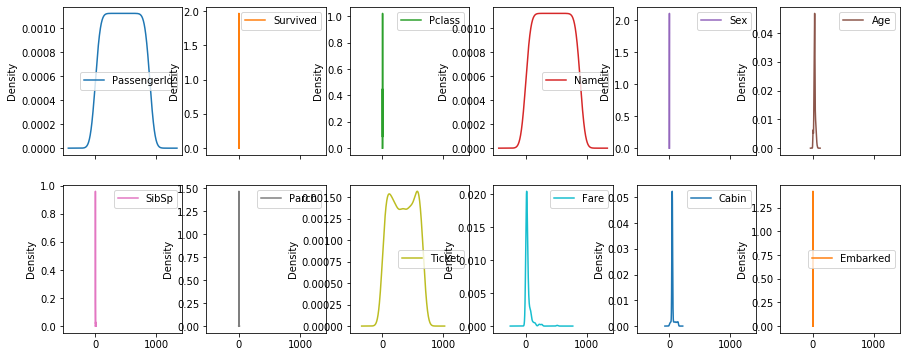

In [19]:
#checking the skewness
df.plot(kind='kde',subplots=True,layout=(2,6),figsize=(15,6))

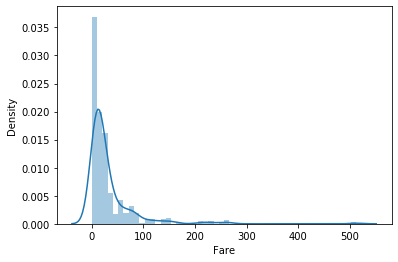

In [20]:
sns.distplot(df['Fare'])

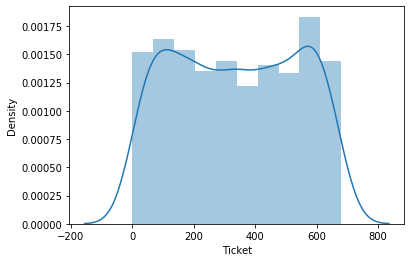

In [21]:
sns.distplot(df['Ticket'])

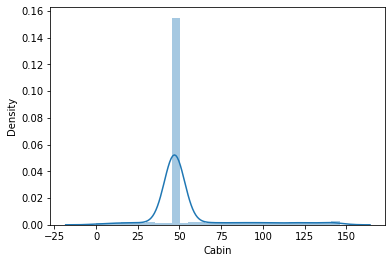

In [22]:
sns.distplot(df['Cabin'])

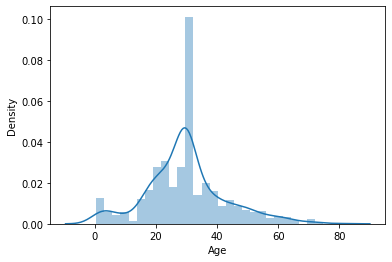

In [23]:
sns.distplot(df['Age'])

Observations:
    
skewness is present in the fair column

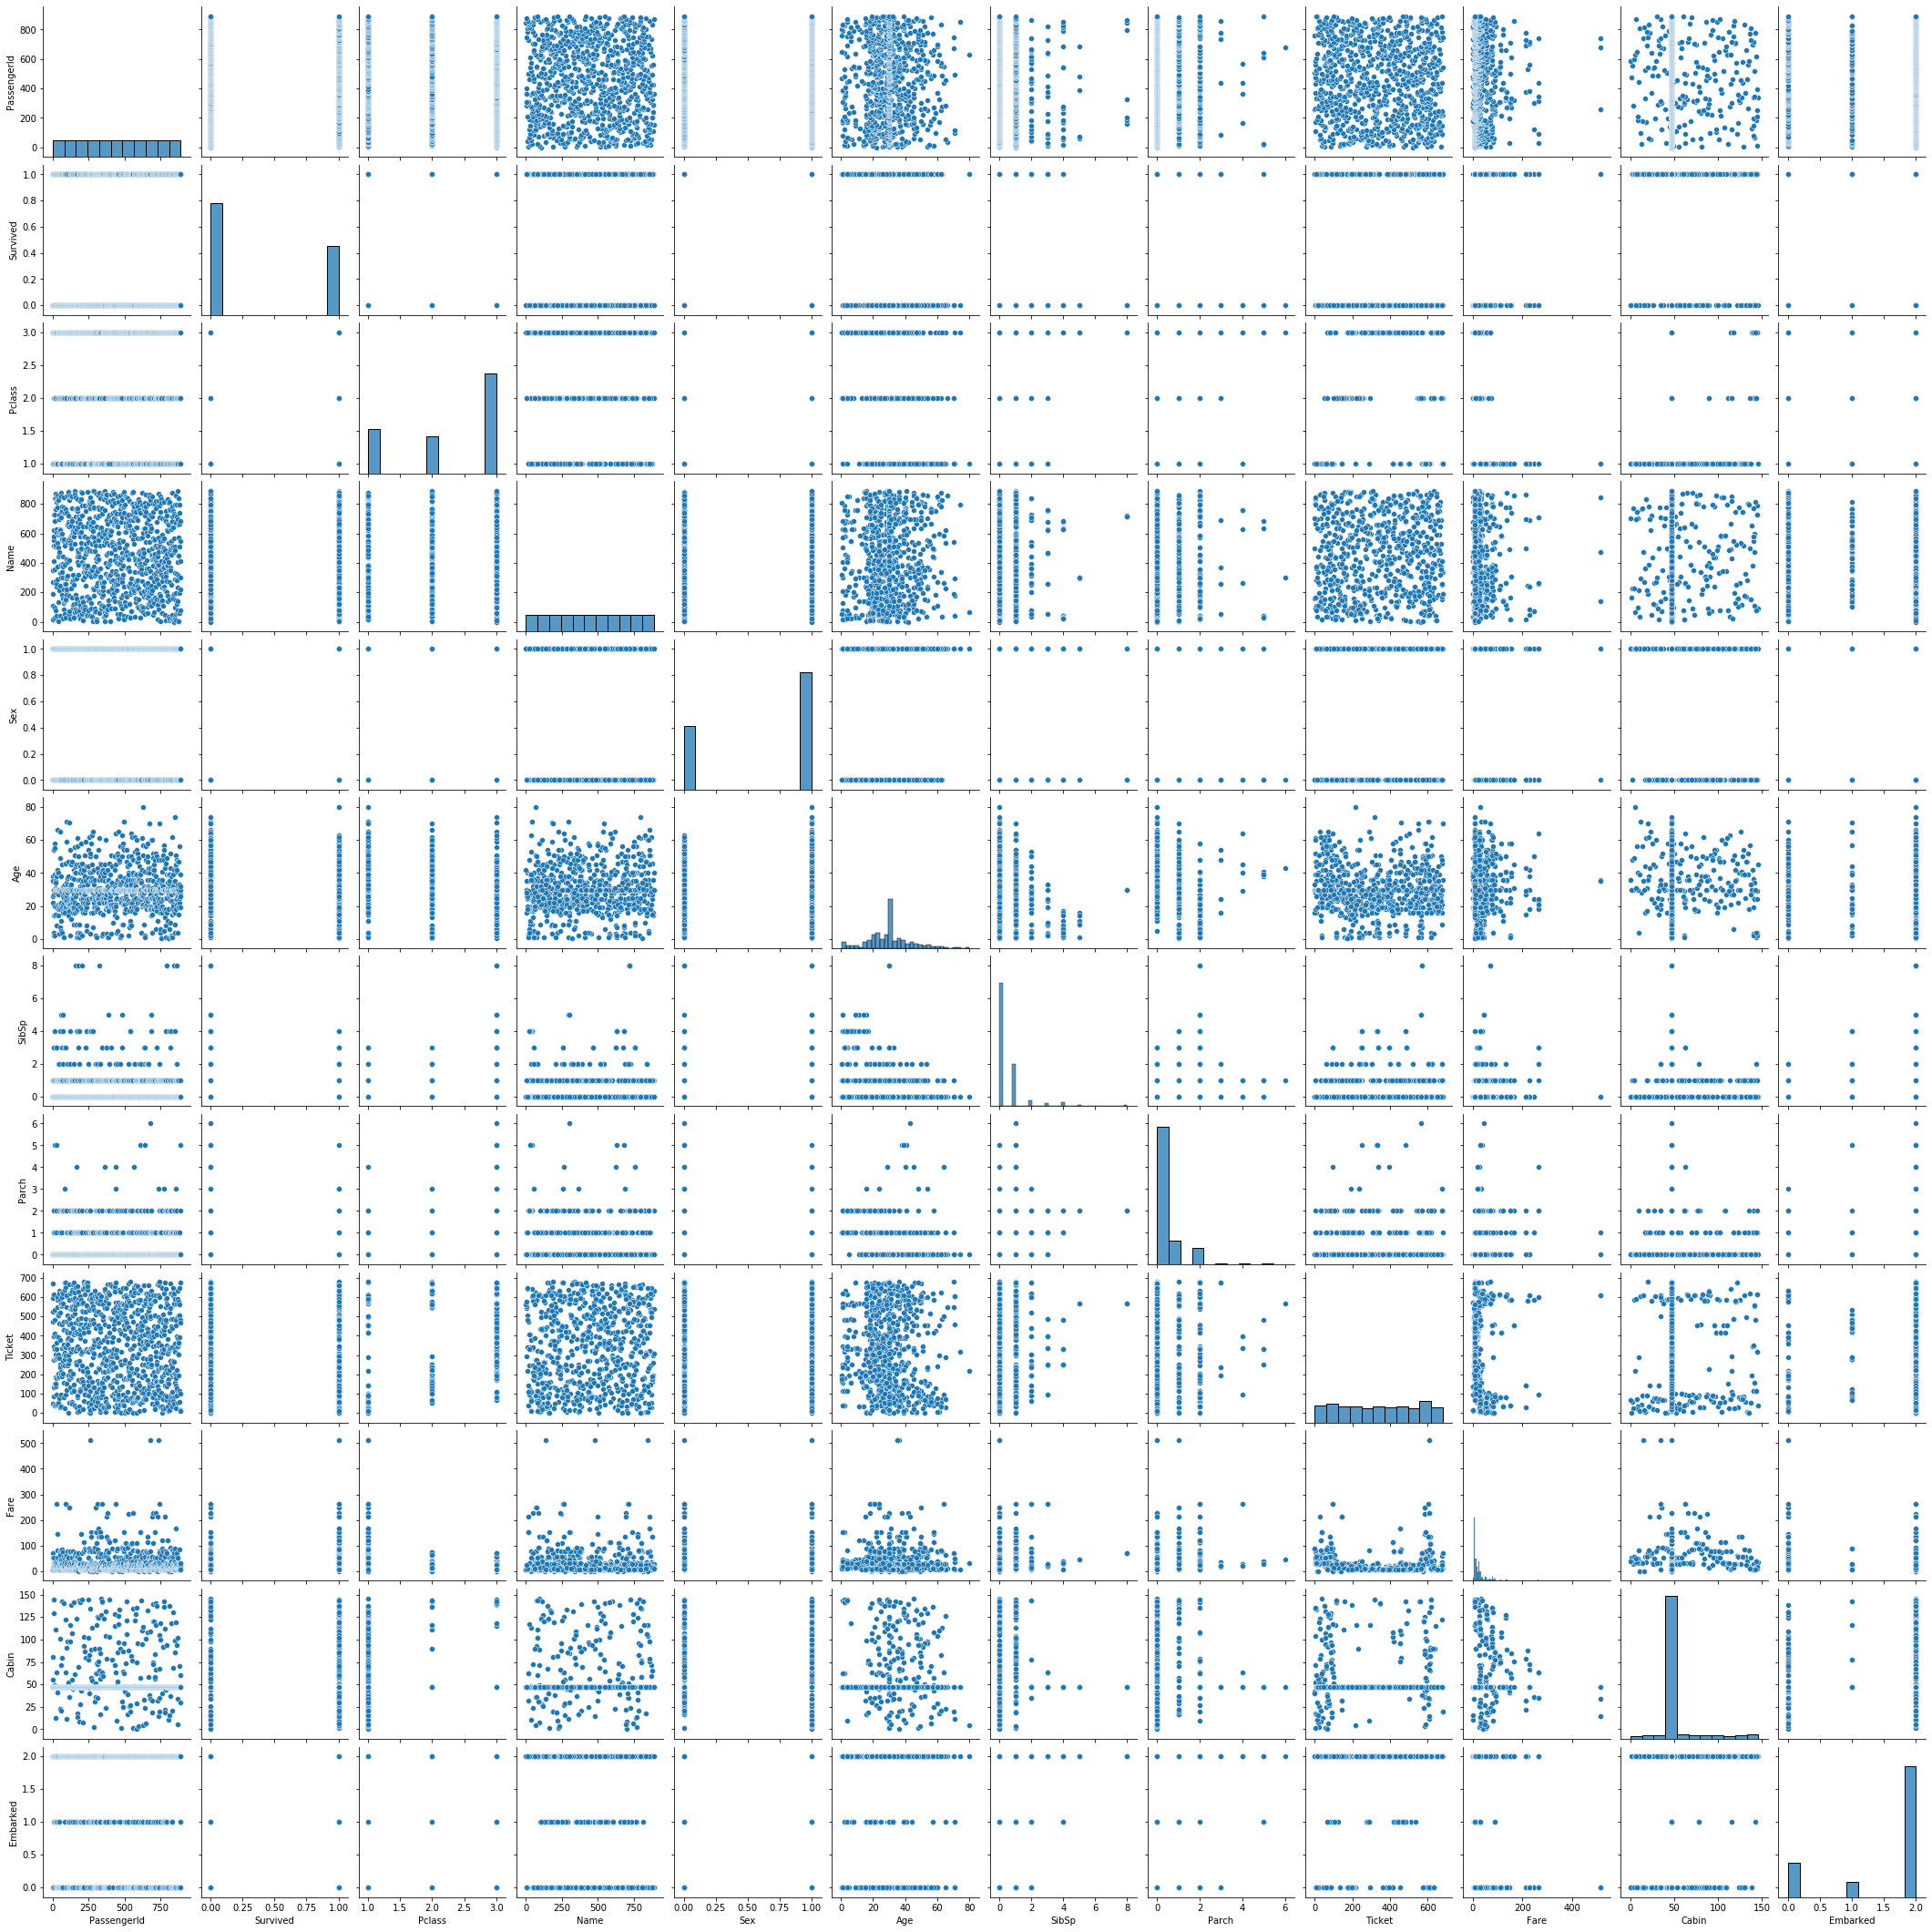

In [24]:
sns.pairplot(df)
plt.show()

In [25]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df.iloc[:,1:]))
z

array([[0.78927234, 0.82737724, 1.31021659, ..., 0.50244517, 0.28188124,
        0.58595414],
       [1.2669898 , 1.56610693, 0.99141018, ..., 0.78684529, 1.16154512,
        1.9423032 ],
       [1.2669898 , 0.82737724, 0.35768524, ..., 0.48885426, 0.28188124,
        0.58595414],
       ...,
       [0.78927234, 0.82737724, 0.12441226, ..., 0.17626324, 0.28188124,
        0.58595414],
       [1.2669898 , 1.56610693, 1.41518943, ..., 0.04438104, 0.27001707,
        1.9423032 ],
       [0.78927234, 0.82737724, 0.87477369, ..., 0.49237783, 0.28188124,
        0.67817453]])

In [26]:
threshold=3
print(np.where(z>3))

(array([  6,  10,  13,  16,  25,  27,  50,  59,  66,  68,  71,  75,  86,
        88,  96, 116, 118, 119, 128, 148, 159, 164, 167, 171, 180, 182,
       183, 193, 201, 205, 233, 251, 258, 261, 262, 266, 278, 299, 309,
       311, 324, 337, 339, 340, 341, 345, 360, 370, 377, 380, 386, 394,
       434, 437, 438, 438, 456, 462, 480, 493, 516, 527, 541, 542, 557,
       558, 567, 577, 585, 610, 618, 630, 638, 662, 672, 678, 679, 683,
       686, 689, 699, 700, 715, 716, 724, 730, 736, 737, 742, 745, 772,
       774, 776, 779, 787, 792, 809, 813, 824, 835, 846, 850, 851, 858,
       863, 885], dtype=int64), array([9, 9, 6, 5, 6, 8, 5, 5, 9, 5, 5, 9, 6, 8, 4, 4, 8, 5, 9, 9, 5, 5,
       6, 5, 5, 5, 9, 9, 5, 9, 5, 9, 8, 5, 9, 5, 5, 8, 9, 8, 5, 9, 9, 9,
       8, 9, 6, 9, 8, 8, 5, 9, 9, 6, 6, 8, 9, 9, 5, 4, 9, 8, 5, 5, 8, 9,
       6, 9, 9, 6, 9, 4, 6, 9, 4, 6, 8, 5, 5, 8, 9, 8, 9, 8, 9, 8, 6, 8,
       8, 4, 9, 6, 9, 8, 5, 5, 9, 5, 5, 9, 5, 5, 4, 6, 5, 6], dtype=int64))


In [27]:
dfnew=df[(z<3).all(axis=1)]
dfnew

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,523,7.2500,47,2
1,2,1,1,190,0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.000000,0,0,669,7.9250,47,2
3,4,1,1,272,0,35.000000,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.000000,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.000000,0,0,101,13.0000,47,2
887,888,1,1,303,0,19.000000,0,0,14,30.0000,30,2
888,889,0,3,413,0,29.699118,1,2,675,23.4500,47,2
889,890,1,1,81,1,26.000000,0,0,8,30.0000,60,0


105 rows are dropped

In [28]:
#separating data
x=dfnew.iloc[:,0:-1]
y=dfnew.iloc[:,-1]

In [29]:
x

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,108,1,22.000000,1,0,523,7.2500,47
1,2,1,1,190,0,38.000000,1,0,596,71.2833,81
2,3,1,3,353,0,26.000000,0,0,669,7.9250,47
3,4,1,1,272,0,35.000000,1,0,49,53.1000,55
4,5,0,3,15,1,35.000000,0,0,472,8.0500,47
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.000000,0,0,101,13.0000,47
887,888,1,1,303,0,19.000000,0,0,14,30.0000,30
888,889,0,3,413,0,29.699118,1,2,675,23.4500,47
889,890,1,1,81,1,26.000000,0,0,8,30.0000,60


In [30]:
y

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 786, dtype: int32

In [76]:
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.datasets import load_iris

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)

In [82]:
dtc=DecisionTreeClassifier()
sv=SVC()
knn=KNeighborsClassifier()
mnb=MultinomialNB()

model=[dtc,sv,knn,mnb]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of DecisionTreeClassifier() is:
0.8771186440677966
[[ 33   0  11]
 [  0  14   1]
 [  9   8 160]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        44
           1       0.64      0.93      0.76        15
           2       0.93      0.90      0.92       177

    accuracy                           0.88       236
   macro avg       0.78      0.86      0.81       236
weighted avg       0.88      0.88      0.88       236



accuracy score of SVC() is:
0.75
[[  0   0  44]
 [  0   0  15]
 [  0   0 177]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.00      0.00      0.00        15
           2       0.75      1.00      0.86       177

    accuracy                           0.75       236
   macro avg       0.25      0.33      0.29       236
weighted avg       0.56      0.75      0.64       236



accuracy score of KNeighborsClassifier() is

decision tree gives the most highest accuracy of 87%

In [83]:
#cross validation

from sklearn.model_selection import cross_val_score

score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.12658228 0.21656051 0.33121019 0.47133758 0.63694268]
0.35652664677900503
0.18161528255215462


In [84]:
score=cross_val_score(sv,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.72151899 0.72611465 0.72611465 0.71974522 0.71974522]
0.7226477465129404
0.002903867033010324


In [85]:
score=cross_val_score(dt,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.84810127 0.82802548 0.88535032 0.84713376 0.82802548]
0.8473272595339838
0.020935649514354688


In [86]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.64556962 0.65605096 0.63694268 0.68152866 0.71974522]
0.6679674272353463
0.02990333267847713


In [89]:
#prediction
p=np.array([1,0,3,108,1,22.000000,1,0,523,7.2500,47])
p=p.reshape(1,-1)
p.shape

(1, 11)

In [90]:
dt.predict(p)

array([2])

In [91]:
def test_pred(p):
    p=p.reshape(1,-1)
    val=dt.predict(p)
    if val==0:
        print('c')
    elif val==1:
        print('q')
    elif val==2:
        print("s")

In [92]:
p=np.array([1,0,3,108,1,22.000000,1,0,523,7.2500,47])
test_pred(p)

s


In [93]:
#saving the best model

import pickle

filename='titanicfile.pkl'
pickle.dump(dt, open(filename, 'wb'))
#load the model from disk
loaded_model=pickle.load(open(filename,'rb'))

loaded_model.predict(x_test)

array([2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 2, 2, 0,
       1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2])

In [95]:
result=loaded_model.score(x_test,y_test)
print(result*100)

86.4406779661017


In [94]:
#ensembling

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=42)

rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9194915254237288
[[ 29   0  15]
 [  0  13   2]
 [  1   1 175]]
              precision    recall  f1-score   support

           0       0.97      0.66      0.78        44
           1       0.93      0.87      0.90        15
           2       0.91      0.99      0.95       177

    accuracy                           0.92       236
   macro avg       0.94      0.84      0.88       236
weighted avg       0.92      0.92      0.91       236



In [97]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=['predicted','original'])
conclusion.transpose()

,predicted,original
0,2,2
1,0,1
2,1,2
3,2,2
4,2,1
...,...,...
231,2,2
232,2,2
233,2,2
234,2,2
